<a href="https://colab.research.google.com/github/6FAN/SkLearn/blob/main/LINEAR_Regression_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("darkgrid")
sns.set_theme("paper")
import numpy as np

* let us consider an example where the five weeks sales data (in thousands) is given as shown in table.
* Apply linear regression technique to predict the 7th and 12th week sales.

In [ ]:
data = {
    "week" : [1, 2, 3, 4, 5],
    "sale in k" : [1.2, 1.8, 2.6, 3.2, 3.8]
}
df = pd.DataFrame(data)
df

,week,sale in k
0,1,1.2
1,2,1.8
2,3,2.6
3,4,3.2
4,5,3.8


<AxesSubplot:xlabel='week', ylabel='sale in k'>

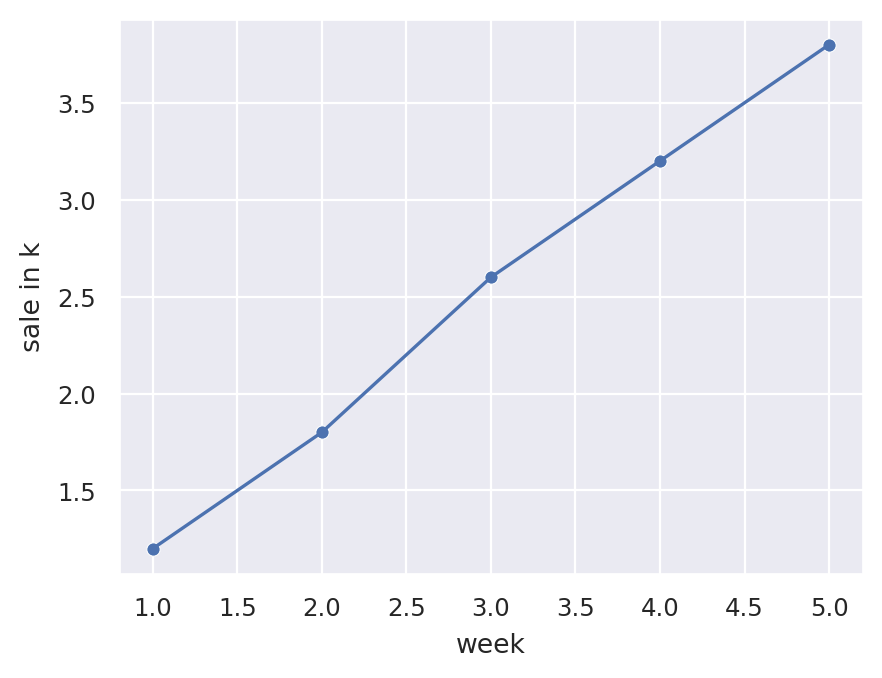

In [ ]:
sns.lineplot(data=df,
             x='week',
             y='sale in k')
sns.scatterplot(data=df,
             x='week',
             y='sale in k')

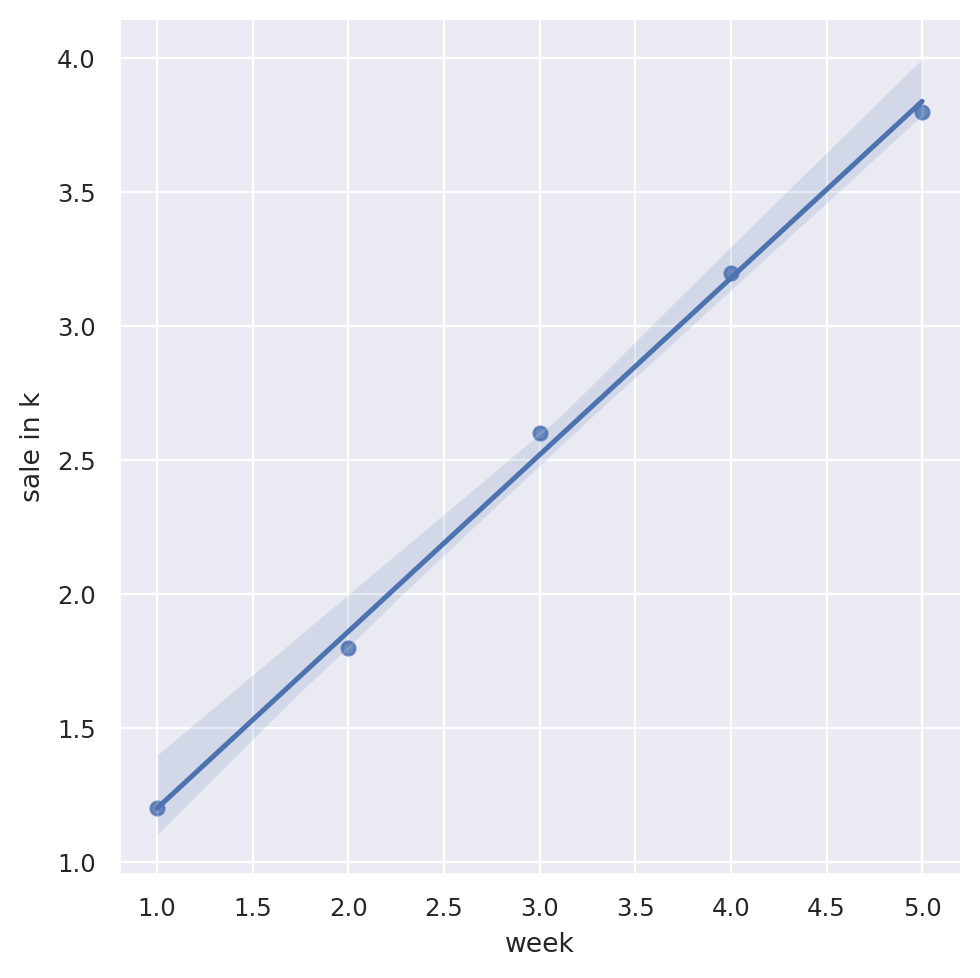

In [ ]:
sns.lmplot(data=df,
           x="week",
           y='sale in k')

* LinearRegression equation is given by

In [ ]:
'''
y = mx + c

 m = (mean(xy)- mean(x)* mean(y))
      ____________________________
       mean(x^2) - (mean(x))^2


 c = mean(y) - m * mean(x)
 '''

In [ ]:
'''
mean(x) = (1+2+3+4+5)/5
        = 15 / 5
        = 3

mean(y) = (1.2+1.8+2.6+3.2+3.8)/5
        = (12.6) / 5
        = 2.52

mean(xy)= (1.2+3.6+7.8+12.8+19) / 5
        = 44.4 / 5
        = 8.88


mean(x^2) = (1+4+9+16+25) / 5
          = (55) / 5
          = 11
'''

In [ ]:
'''
m = 8.88 - (3 * 2.52)
    ___________________
    (11) - (3)^2


    =(8.88 - 7.56) / (11 - 9)

    = 1.32 / 2

m   = 0.66
'''

In [ ]:
'''
c = mean(y) - m * mean(x)

  = 2.52 - (0.66 * 3)

  = 2.52 - 1.98

c = 0.54
'''

In [ ]:
'''
y = mx + c
y = 0.66 * x + 0.54
'''

**The predicted 7th week sale (when x = 7) is,**

In [ ]:
'''
so, we know x is 7
y = 0.66 * 7 + 0.54
  = 5.16
'''

In [ ]:
df

,week,sale in k
0,1,1.2
1,2,1.8
2,3,2.6
3,4,3.2
4,5,3.8


In [ ]:
x = df.iloc[:, 0]
x

0    1
1    2
2    3
3    4
4    5
Name: week, dtype: int64

In [ ]:
y = df.iloc[:,-1]
y

0    1.2
1    1.8
2    2.6
3    3.2
4    3.8
Name: sale in k, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=1)



In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

x_train = x_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
LinReg.intercept_

array([3.2])

In [ ]:
LinReg.coef_

array([[0.]])

In [ ]:
x_test = np.array(x_test).reshape(-1,1)
y_pred = LinReg.predict(x_test)
y_pred

array([[3.2],
       [3.2],
       [3.2],
       [3.2]])

In [ ]:
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
err = y_test - y_pred
err

array([[-0.6],
       [-1.4],
       [ 0.6],
       [-2. ]])

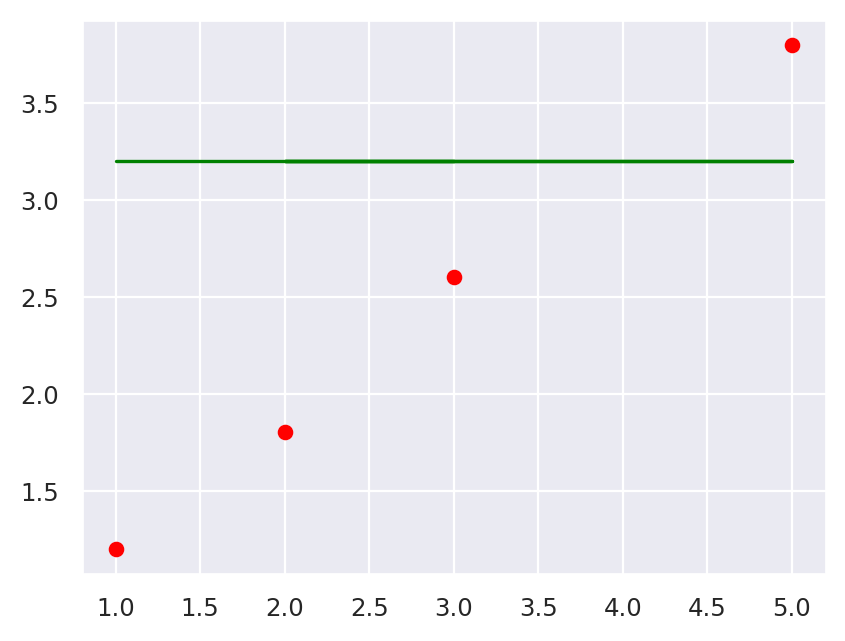

In [ ]:
plt.scatter(x_test, y_test, c="red")
plt.plot(x_test, y_pred, c="green")

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(
        y_test, y_pred)

print(f'Mean Absolute Error : {MAE}')
MSE = metrics.mean_squared_error(
    y_test, y_pred)

print(f'Mean Squared Error : {MSE}')
RMSE = np.sqrt(MSE)
print(f'Root Mean Squared Error : {RMSE}')

R2 = metrics.r2_score(y_test, y_pred)
print(f'R2 Score : {R2}')

Mean Absolute Error : 1.15
Mean Squared Error : 1.67
Root Mean Squared Error : 1.2922847983320085
R2 Score : -0.7625329815303432


# Useing Iris DataSET

In [ ]:
ir_df = sns.load_dataset('iris')
ir_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
ir_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

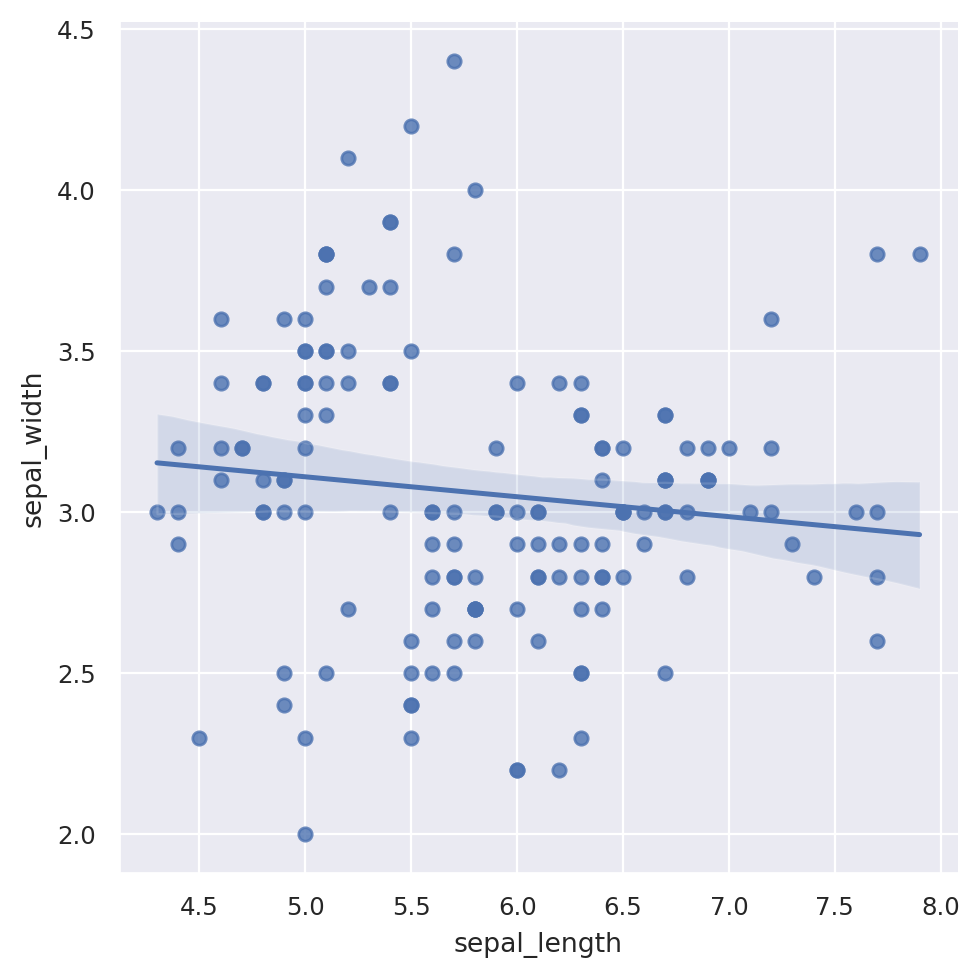

In [ ]:
sns.lmplot(data=ir_df, x='sepal_length', y='sepal_width')

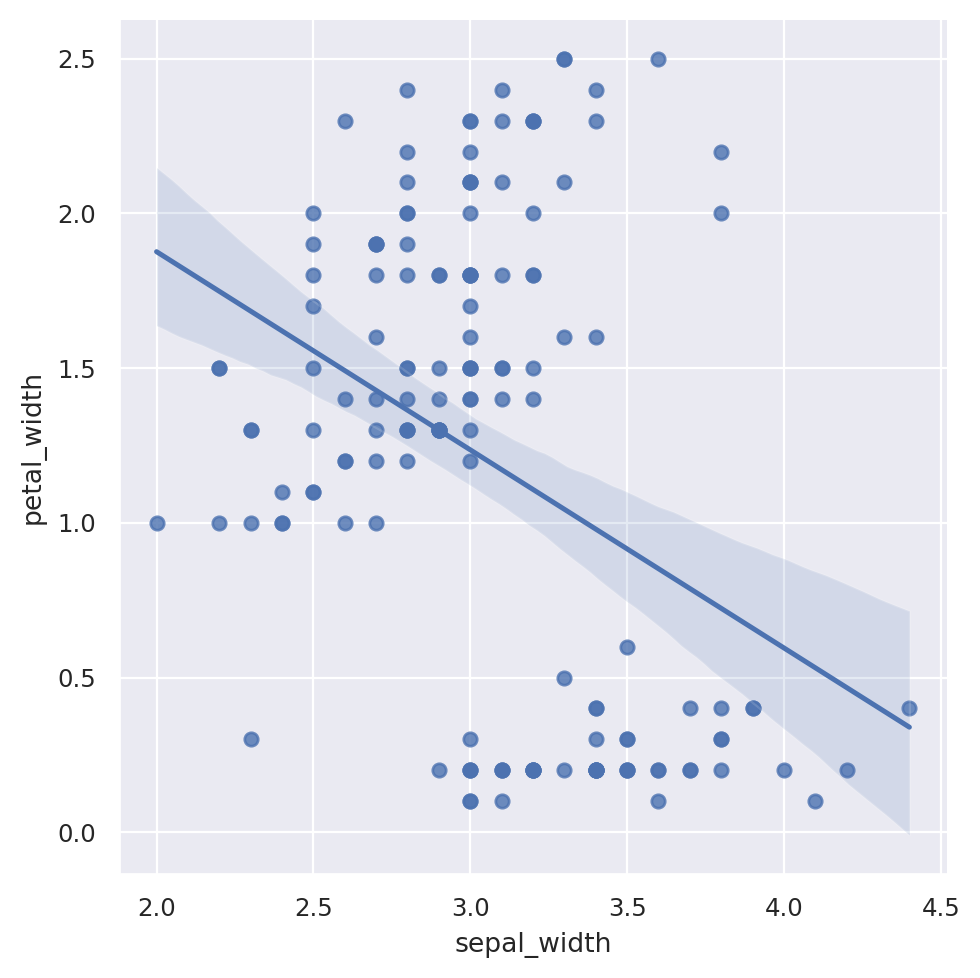

In [ ]:
sns.lmplot(data=ir_df, x='sepal_width', y='petal_width')

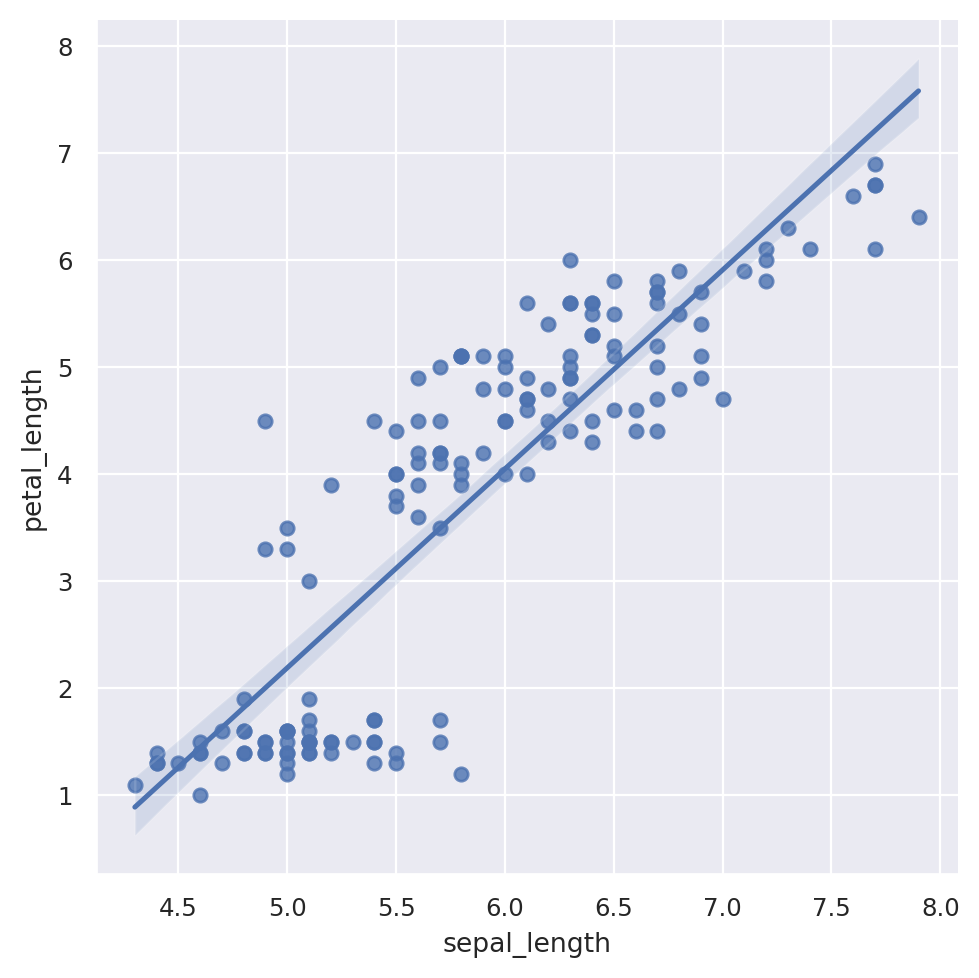

In [ ]:
sns.lmplot(data=ir_df, x='sepal_length', y='petal_length')

In [ ]:
ir_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = ir_df.iloc[:, 0:1]
x

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
y = ir_df.iloc[:, 2:3]
y

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [ ]:
from sklearn.model_selection import train_test_split

x_tr,x_ts,y_tr,y_ts = train_test_split(
    x, y, test_size=0.3, random_state=11)

In [ ]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()

LinReg.fit(x_tr, y_tr)

LinearRegression()

In [ ]:
y_prd = LinReg.predict(x_ts)
y_prd

array([[5.58918296],
       [5.39879035],
       [4.63721988],
       [4.63721988],
       [4.82761249],
       [1.97172324],
       [5.39879035],
       [3.49486417],
       [1.78133062],
       [4.25643464],
       [4.06604203],
       [4.06604203],
       [2.92368632],
       [3.49486417],
       [5.77957558],
       [1.21015277],
       [4.63721988],
       [3.30447156],
       [5.01800511],
       [3.68525679],
       [3.30447156],
       [1.590938  ],
       [1.40054538],
       [4.82761249],
       [1.78133062],
       [1.78133062],
       [3.87564941],
       [5.20839773],
       [2.92368632],
       [4.06604203],
       [2.35250847],
       [5.77957558],
       [7.30271652],
       [2.16211585],
       [1.590938  ],
       [7.30271652],
       [7.1123239 ],
       [5.39879035],
       [3.11407894],
       [4.06604203],
       [2.16211585],
       [7.68350175],
       [1.40054538],
       [5.77957558],
       [5.01800511]])

In [ ]:
y_ts.head()

,petal_length
112,5.5
145,5.2
133,5.1
56,4.7
111,5.3


In [ ]:
err_ir = y_ts - y_prd
err_ir.head()

,petal_length
112,-0.089183
145,-0.198790
133,0.462780
56,0.062780
111,0.472388


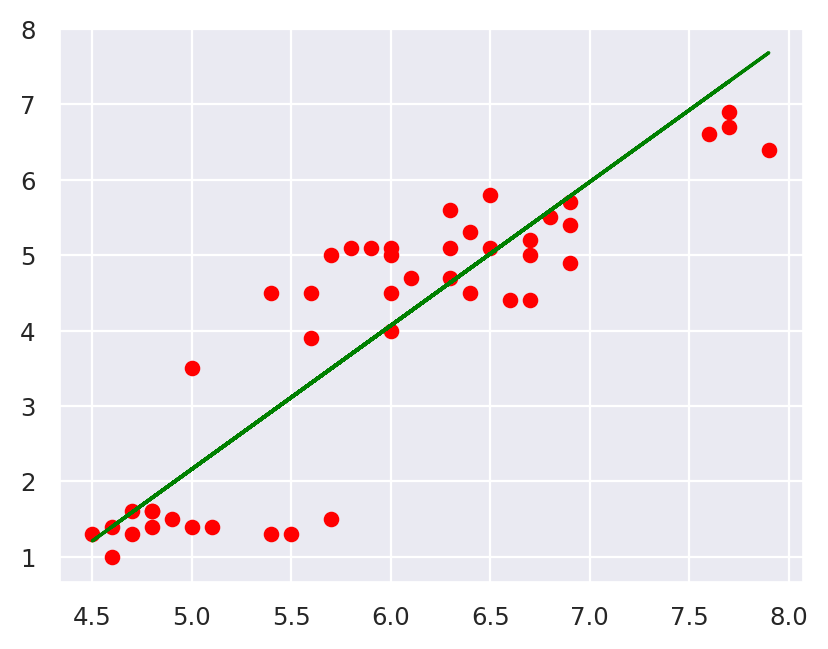

In [ ]:
plt.scatter(x_ts, y_ts, c="red")
plt.plot(x_ts, y_prd, c="green")
plt.show()

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(
        y_ts, y_prd)

print(f'Mean Absolute Error : {MAE}')
MSE = metrics.mean_squared_error(
    y_ts, y_prd)

print(f'Mean Squared Error : {MSE}')
RMSE = np.sqrt(MSE)
print(f'Root Mean Squared Error : {RMSE}')

R2 = metrics.r2_score(y_ts, y_prd)
print(f'R2 Score : {R2}')

Mean Absolute Error : 0.6822475513021194
Mean Squared Error : 0.7455080909165804
Root Mean Squared Error : 0.8634281040808091
R2 Score : 0.7786093650489114


In [ ]:
ir_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')